# QUESTION 3. DESCRIPTIVE STATISTICS AND FACTORS THAT CONTRIBUTE TO CLIENT LOST

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [24]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\Python Fundamentals for Data Analysts 4\Instacart Basket Analysis'

In [25]:
path

'C:\\Users\\Tim\\Desktop\\Data Analytics Intro\\Python Fundamentals for Data Analysts 4\\Instacart Basket Analysis'

In [29]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\Python Fundamentals for Data Analysts 4\Instacart Basket Analysis\02 Data\PGBank Data\PigEBank-Client-Clean_Data set.xlsx' 

In [30]:
path

'C:\\Users\\Tim\\Desktop\\Data Analytics Intro\\Python Fundamentals for Data Analysts 4\\Instacart Basket Analysis\\02 Data\\PGBank Data\\PigEBank-Client-Clean_Data set.xlsx'

In [33]:
df_bank = pd.read_excel(r'C:\Users\Tim\Desktop\Data Analytics Intro\Python Fundamentals for Data Analysts 4\Instacart Basket Analysis\02 Data\PGBank Data\PigEBank-Client-Clean_Data set.xlsx')

In [34]:
df_bank.head()

,Row_Number,Customer_ID,Last_Name,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
0,1,15634602,Hargrave,619,France,Female,39,2,0.00,1,1,1,98.00,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
print(df_bank.head())

   Row_Number  Customer_ID Last_Name  Credit Score Country  Gender  Age  \
0           1     15634602  Hargrave           619  France  Female   39   
1           2     15647311      Hill           608   Spain  Female   41   
2           3     15619304      Onio           502  France  Female   42   
3           4     15701354      Boni           699  France  Female   39   
4           5     15737888  Mitchell           850   Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard?  IsActiveMember  \
0       2       0.00              1           1               1   
1       1   83807.86              1           0               1   
2       8  159660.80              3           1               0   
3       1       0.00              2           0               0   
4       2  125510.82              1           1               1   

   Estimated Salary  ExitedFromBank?  
0             98.00                1  
1         112542.58                0  
2         113931.57          

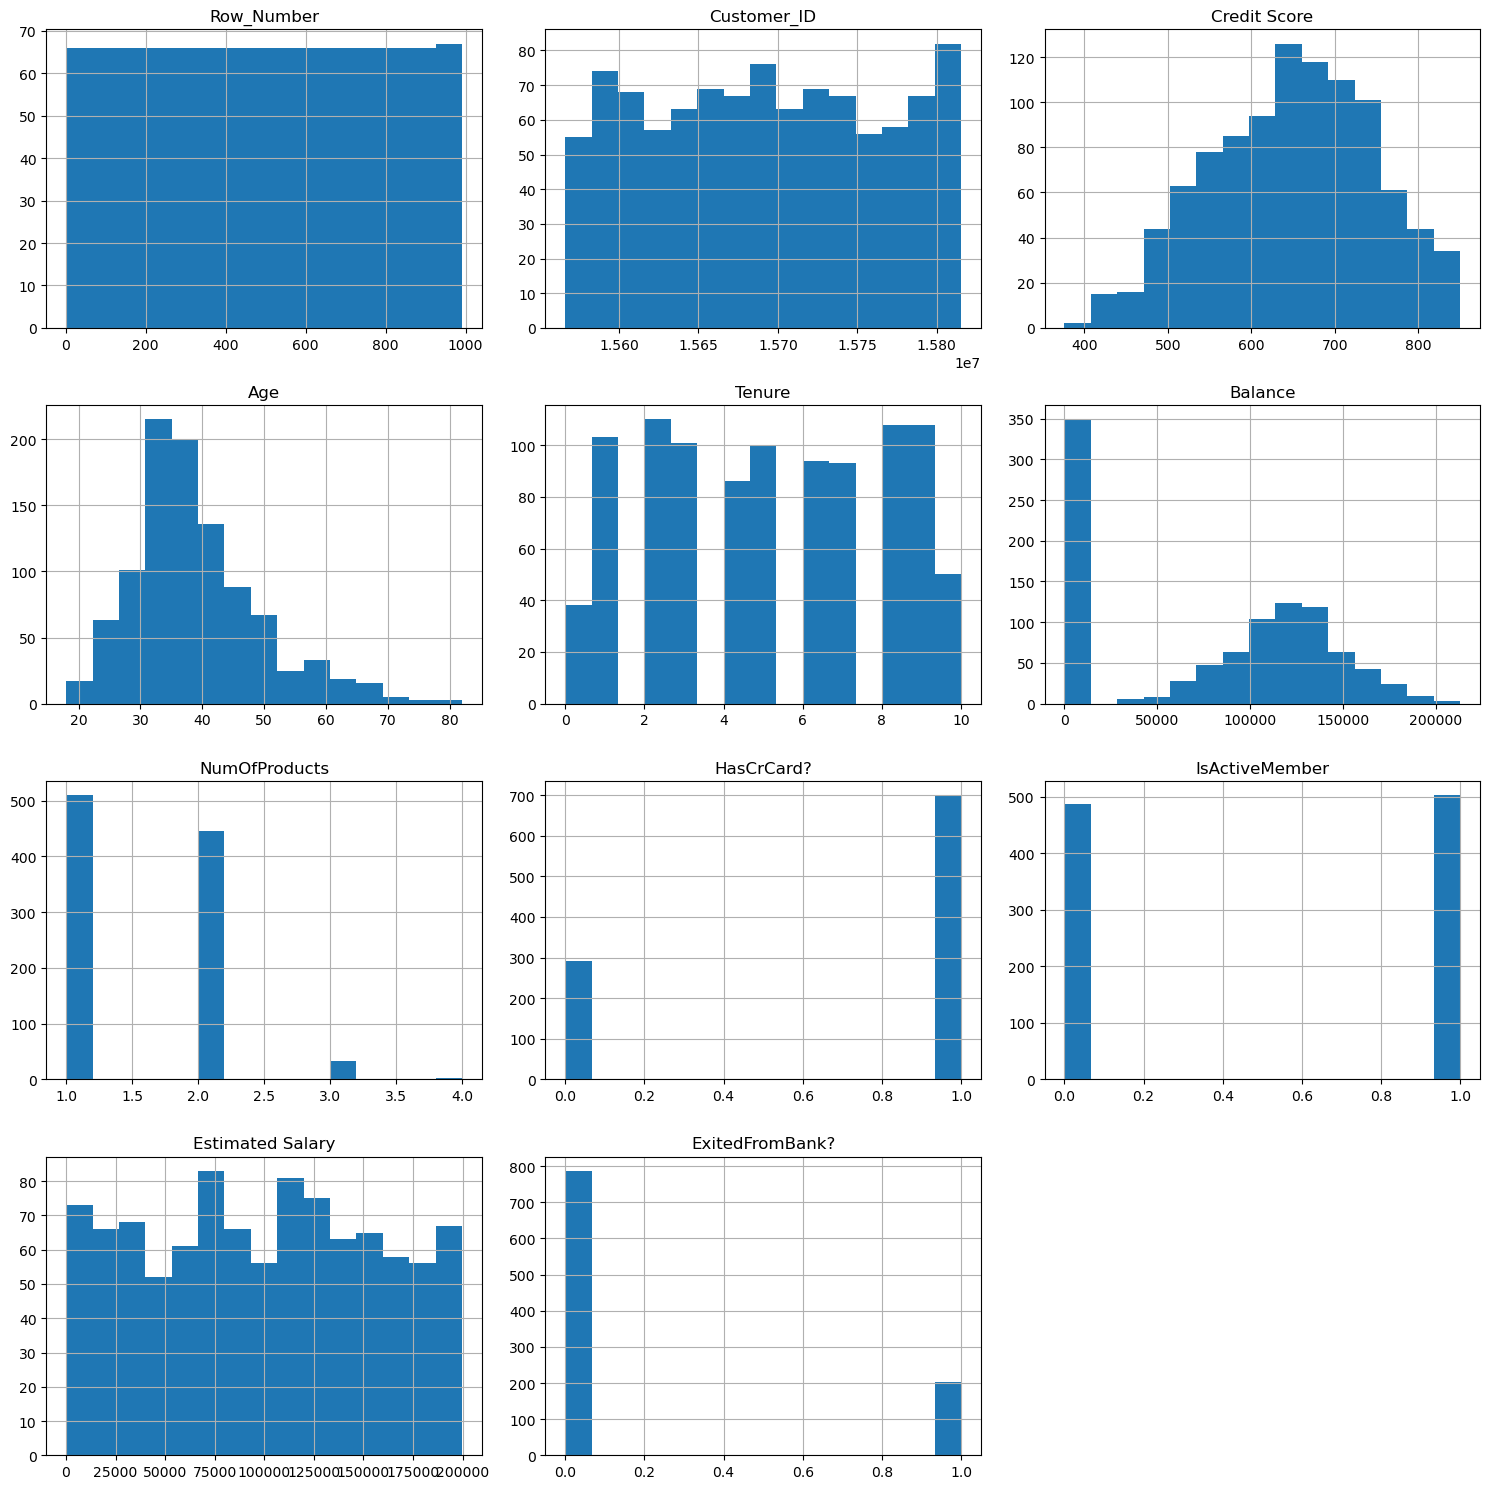

In [36]:
#Plot histograms for all numeric columns
df_bank.hist(bins=15, figsize=(15, 15), layout=(4, 3))  

# Adjusted to 4 rows and 3 columns\n",
plt.tight_layout()
plt.show()

In [37]:
# Review any missing values

df_bank.isnull().sum()

Row_Number          0
Customer_ID         0
Last_Name           0
Credit Score        0
Country             0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard?          0
IsActiveMember      0
Estimated Salary    1
ExitedFromBank?     0
dtype: int64

In [38]:
# REVIEW DATA TYPES
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row_Number        991 non-null    int64  
 1   Customer_ID       991 non-null    int64  
 2   Last_Name         991 non-null    object 
 3   Credit Score      991 non-null    int64  
 4   Country           991 non-null    object 
 5   Gender            991 non-null    object 
 6   Age               991 non-null    int64  
 7   Tenure            991 non-null    int64  
 8   Balance           991 non-null    float64
 9   NumOfProducts     991 non-null    int64  
 10  HasCrCard?        991 non-null    int64  
 11  IsActiveMember    991 non-null    int64  
 12  Estimated Salary  990 non-null    float64
 13  ExitedFromBank?   991 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 108.5+ KB


In [39]:
# Convert 'Row_Number' and 'Customer_ID' columns to string type: 

df_bank[['Row_Number', 'Customer_ID']] = df_bank[['Row_Number', 'Customer_ID']].astype(str)

In [40]:
#Checking data: 

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row_Number        991 non-null    object 
 1   Customer_ID       991 non-null    object 
 2   Last_Name         991 non-null    object 
 3   Credit Score      991 non-null    int64  
 4   Country           991 non-null    object 
 5   Gender            991 non-null    object 
 6   Age               991 non-null    int64  
 7   Tenure            991 non-null    int64  
 8   Balance           991 non-null    float64
 9   NumOfProducts     991 non-null    int64  
 10  HasCrCard?        991 non-null    int64  
 11  IsActiveMember    991 non-null    int64  
 12  Estimated Salary  990 non-null    float64
 13  ExitedFromBank?   991 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 108.5+ KB


The one null gender was replaced with Male as an assumption. Deleting it is of irrelevance as the significance of it might not affect the analysis hence was replaced with male gender. 

In [42]:
# DESCRIPTIVE ANALYSIS
df_bank.describe()

,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,990.000000,991.000000
mean,648.486377,39.092836,5.066599,78002.718063,1.522704,0.706357,0.507568,98472.167838,0.205853
std,98.055064,10.238739,2.928371,62799.237345,0.573170,0.455660,0.500195,57281.273628,0.404527
min,376.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,98.000000,0.000000
25%,580.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,48193.505000,0.000000
50%,653.000000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.000000,98334.925000,0.000000
75%,721.000000,44.000000,8.000000,129461.850000,2.000000,1.000000,1.000000,146281.320000,0.000000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.000000


Note: 50% of clients have a credit card while 60% have one product. At least, the majority of clients will access 1 product with a maximum of 4. The tenure of Clients is measured between 0 to 10 years. 

In [43]:
# Replace \"Age\" = 2 with the median age of the column

df_bank.loc[df_bank['Age'] == 2, 'Age'] = (df_bank['Age'].median())

In [44]:
# review Age new min 

df_bank.describe()

,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,990.000000,991.000000
mean,648.486377,39.092836,5.066599,78002.718063,1.522704,0.706357,0.507568,98472.167838,0.205853
std,98.055064,10.238739,2.928371,62799.237345,0.573170,0.455660,0.500195,57281.273628,0.404527
min,376.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,98.000000,0.000000
25%,580.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,48193.505000,0.000000
50%,653.000000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.000000,98334.925000,0.000000
75%,721.000000,44.000000,8.000000,129461.850000,2.000000,1.000000,1.000000,146281.320000,0.000000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.000000


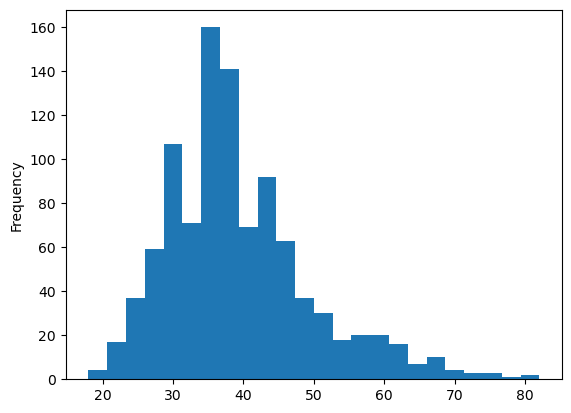

In [45]:
#Creating histogram on ages

hist=df_bank['Age'].plot.hist(bins=24)

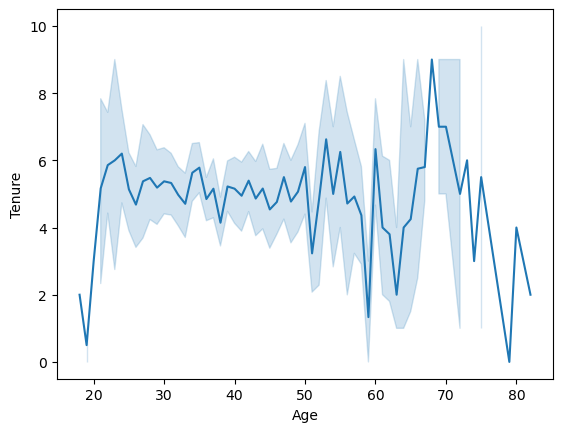

In [46]:
#Creating a line chart to analise the correlation between age ad tenure

line = sns.lineplot(data=df_bank,x='Age',y='Tenure')

# QUESTION 3. IDENTIFY RISK FACTOR CONTRIBUTION TO CLIENTS EXITING THE BANK

In [50]:
# Data Splitting: Train-test split
X = df_bank.drop('ExitedFromBank?', axis=1)
y = df_bank['ExitedFromBank?']

In [53]:
#Editing the ExitedBank column with tags to analise banks loyalty client

results=[]

for value in df_bank ['ExitedFromBank?']:
    if value == 0:
        results.append('Loyal Clients')
    elif value == 1:
        results.append('ExitedfromBank')

In [54]:
# Add the new column to the df_bank 

df_bank['Client Loyalty'] = results

In [55]:
#Checking data
df_bank['Client Loyalty'].value_counts(dropna=False)

Client Loyalty
Loyal Clients     787
ExitedfromBank    204
Name: count, dtype: int64

In [56]:
# Performing statistics on Clients Loyalty related to Loyalty flag

df_bank.groupby('Client Loyalty').agg({'Credit Score' : ['mean', 'min', 'max']})

Credit Score          
                       mean  min  max
Client Loyalty                       
ExitedfromBank   636.529412  376  850
Loyal Clients    651.585769  411  850

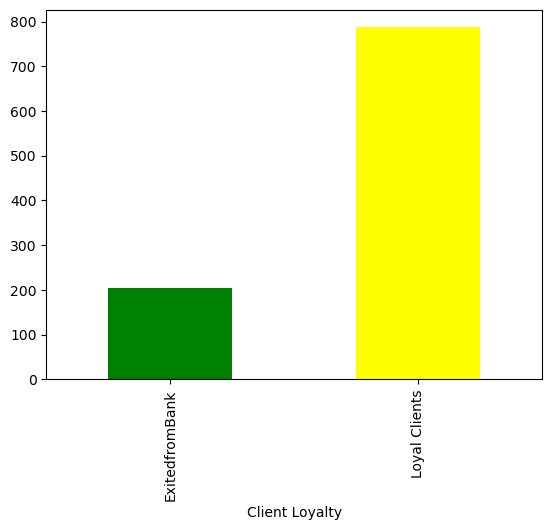

In [57]:
#Creating bar chart on the Client Loyalty

bar = df_bank['Client Loyalty'].value_counts().sort_index().plot.bar(color=['green','yellow','blue'])

In [58]:
# Separate clients who have left from those who have stayed

exit_bank = df_bank[df_bank['ExitedFromBank?'] == 1]
stayed_bank = df_bank[df_bank['ExitedFromBank?'] == 0]

In [59]:
#Checking the subset sum up the total correctly

len(exit_bank) + len(stayed_bank)

991

In [60]:
#Analysing the stayed_bank df
stayed_bank.shape

(787, 15)

In [61]:
# DESCRIPTIVE ANALYSIS ON STAYED_BANK DF

stayed_bank.describe()

,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,787.000000,787.00000,787.000000,787.000000,787.000000,787.000000,787.000000,786.000000,787.0
mean,651.585769,37.50953,5.157560,74830.867789,1.538755,0.706480,0.561626,98942.793003,0.0
std,97.468511,9.81059,2.926683,62819.020794,0.511407,0.455664,0.496503,56605.530469,0.0
min,411.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.0
25%,583.000000,31.00000,3.000000,0.000000,1.000000,0.000000,0.000000,51236.222500,0.0
50%,657.000000,36.00000,5.000000,93147.000000,2.000000,1.000000,1.000000,98334.925000,0.0
75%,722.500000,41.50000,8.000000,127817.875000,2.000000,1.000000,1.000000,145925.935000,0.0
max,850.000000,82.00000,10.000000,197041.800000,3.000000,1.000000,1.000000,199661.500000,0.0


NOTE: Clients that stayed within the bank remain for an average of 5 years. With a Credit score of 657 and an average age of 38 years. 60% of stayed clients are active members with 2 products, an average balance of 93K and an average Estimated salary of 98K. A total number of 787 clients stayed in the bank. Male clients are staying more than female. 

In [62]:
# Check the value_counts function of categorical columns for clients who exit

print(stayed_bank['Country'].value_counts())
print(stayed_bank['Gender'].value_counts())

Country
France     403
Spain      202
Germany    168
Denmark     14
Name: count, dtype: int64
Gender
Male      446
Female    341
Name: count, dtype: int64


In [63]:
# DESCRIPTIVE ANALYSIS ON EXIT_BANK DF

exit_bank.describe()

,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,636.529412,45.200980,4.715686,90239.218873,1.460784,0.705882,0.299020,96658.876765,1.0
std,99.625773,9.558933,2.915484,61352.066625,0.764632,0.456766,0.458955,59922.807565,0.0
min,376.000000,22.000000,0.000000,0.000000,1.000000,0.000000,0.000000,98.000000,1.0
25%,562.750000,39.000000,2.000000,0.000000,1.000000,0.000000,0.000000,42825.860000,1.0
50%,643.000000,45.000000,5.000000,112433.965000,1.000000,1.000000,0.000000,98478.950000,1.0
75%,714.250000,51.000000,7.000000,133713.527500,2.000000,1.000000,1.000000,148291.382500,1.0
max,850.000000,69.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.0


In [64]:
# Check the value_counts function of categorical columns for clients who left\n",
print(exit_bank['Country'].value_counts())
print(exit_bank['Gender'].value_counts())

Country
France     77
Germany    66
Spain      52
Denmark     9
Name: count, dtype: int64
Gender
Female    121
Male       83
Name: count, dtype: int64


Clients that left the bank have 1 product of average age of 45 years, 5 years tenure, 1 credit card, estimated salary of 98k and balances of 112k. More female left the bank than their male counterpart. The average credit score is also 643. 